In [14]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

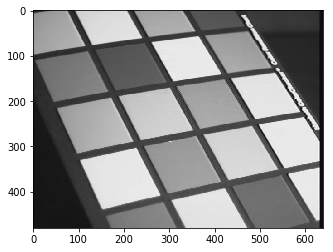

In [25]:
# Use this image for homework
img_origin = cv2.imread('images/practice2_img01.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_origin, cmap='gray')

### Part 1 Convolution

Write a function that convolves an image with given convolution filter.

```
img1 = myImageFilter(img0, h)
```

The function will input a grayscale image `(img0)` and a convolution filter stored in matrix `h`.
The function will output an image `img` of the same size as `img0` which results from convolving `img0` with `h`.
You will need to handle boundary cases on the edges of the image.
For example, when you place a convolution mask on the top left corner of the image, most of the filter mask will lie outside the image.
One solution is to output a zero value at all these locations, the better thing to do is to pad the image such that pixels lying outside the image boundary have the same intensity value as the nearest pixel that lies inside the image.
In the interests of running time, you might want your function to treat `h` kernels that are just row or column vectors and not full matrices separately, but this is optional.

In [20]:
def myImageFilter(img0, h):
    # TODO : write your code
    return img0

In [15]:
import scipy.stats as st

def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

[[ 0.03722201  0.11848604  0.03722201]
 [ 0.11848604  0.37716779  0.11848604]
 [ 0.03722201  0.11848604  0.03722201]]


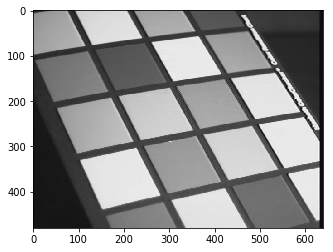

In [26]:
# Use gaussian kernel
gaussian_kernel = gkern(3)
print gaussian_kernel

# Draw blurred image
img0 = img_origin.copy()
img1 = myImageFilter(img0, gaussian_kernel)
plt.imshow(img1, cmap='gray')

# Change parameters and see what happens!

### Part 2 Edge Detection

Write a function that finds edge intensity and orientation in an image.

```
Im, Io, Ix, Iy = myedgeFilter(img, sigma)
```

The function will input a greyscale image `(img)` and `sigma` (scalar). `sigma` is the standard deviation of the Gaussian smoothing kernel to be used before edge detection. The function will output `Im`, the edge magnitude image; Io the edge orientation image and `Ix` and and `Iy` which are the edge filter responses in the `x` and `y` directions respectively.

First, use your convolution function to smooth out the image with the specified Gaussian kernel. This helps reduce noise and spurious fine edges in the image. To find the image gradient in the x direction `Ix`, convolve the smoothed image with the x oriented Sobel filter. Similarly, find `Iy` by convolving the smoothed image with the y oriented Sobel filter.

The edge magnitude image Im and the edge orientation image Io can be calculated from Ix and Iy.

In many cases, the high gradient magnitude region along an edge will be quite thick. For finding lines its best to have edges that are a single pixel wide. Towards this end, make your edge filter implement non maximal suppression, that is for each pixel look at the two neighboring pixels along the gradient direction and if either of those pixels has a larger gradient magnitude then set the edge magnitude at the center pixel to zero.

In [27]:
def myEdgeFilter(img, sigma):
    # TODO : write your code
    # 1. Apply gaussian filter (Use myImageFilter)
    # 2. Apply sobel_x, sobel_y filter
    # 3. Apply non-maximum-suppresion
    return img, img, img, img

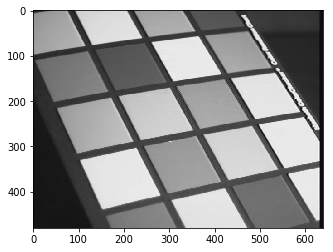

In [28]:
img = img_origin.copy()
Im, Io, Ix, Iy = myEdgeFilter(img, 2)
plt.imshow(Im, cmap='gray')

# Change parameters and see what happens!